In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


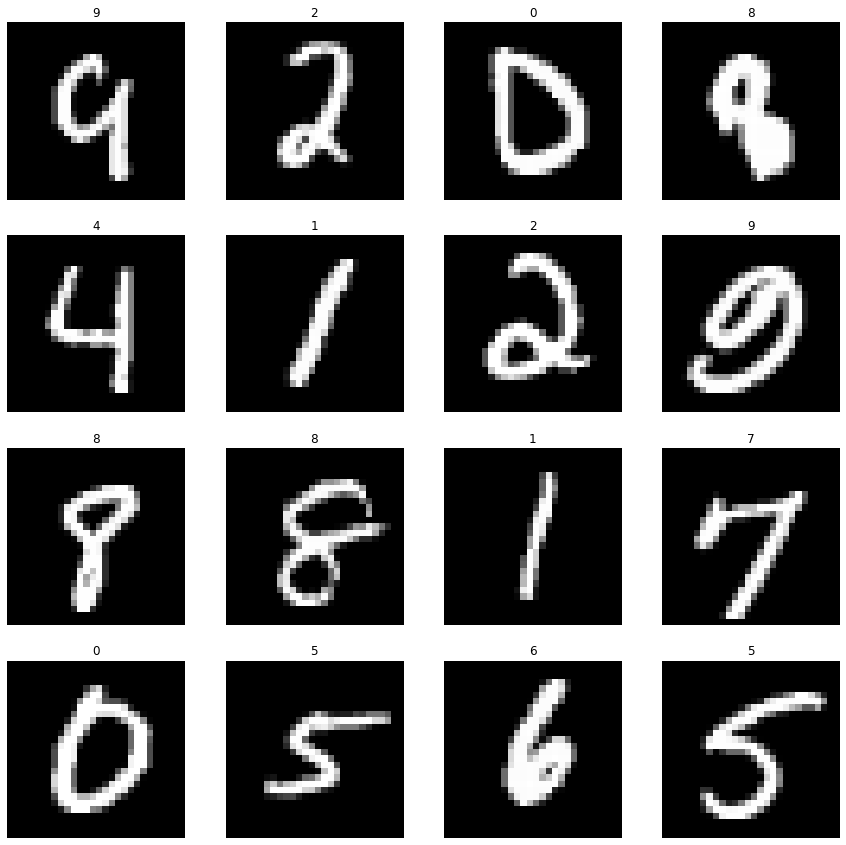

In [5]:
from random import randint
fig, ax = plt.subplots(4, 4, figsize=(15, 15))
# fig.
for i in range(4):
    for j in range(4):
        r_num = randint(0, len(x_train))
        ax[i][j].imshow(x_train[r_num], cmap='gray')
        ax[i][j].set_title(y_train[r_num])
        ax[i][j].axis('off')

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train *= 1/255
x_test *= 1/255

In [9]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [10]:
batch_size = 256
epochs = 15

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.1))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.1))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(.1))

model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 128)         0

In [13]:
history = model.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/15
469/469 [==============================] - 32s 67ms/step - loss: 0.2599 - accuracy: 0.9176 - val_loss: 0.0744 - val_accuracy: 0.9772
Epoch 2/15
469/469 [==============================] - 32s 67ms/step - loss: 0.0742 - accuracy: 0.9775 - val_loss: 0.0511 - val_accuracy: 0.9836
Epoch 3/15
469/469 [==============================] - 31s 66ms/step - loss: 0.0528 - accuracy: 0.9844 - val_loss: 0.0531 - val_accuracy: 0.9839
Epoch 4/15
469/469 [==============================] - 31s 66ms/step - loss: 0.0405 - accuracy: 0.9869 - val_loss: 0.0389 - val_accuracy: 0.9889
Epoch 5/15
469/469 [==============================] - 31s 66ms/step - loss: 0.0324 - accuracy: 0.9899 - val_loss: 0.0420 - val_accuracy: 0.9884
Epoch 6/15
469/469 [==============================] - 31s 66ms/step - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0464 - val_accuracy: 0.9863
Epoch 7/15
469/469 [==============================] - 31s 66ms/step - loss: 0.0243 - accuracy: 0.9920 - val_loss: 0.0433 - val_accuracy:

In [14]:
model.save('mnist_15_epochs.h5')

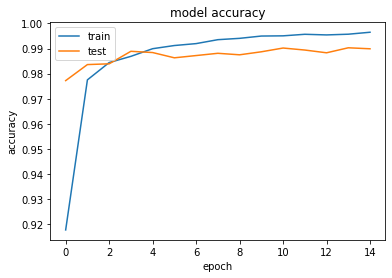

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

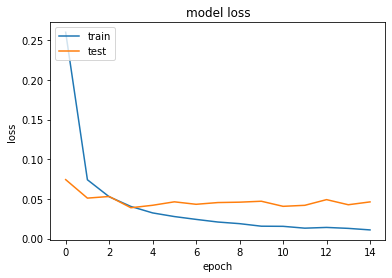

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
from keras.models import load_model
my_model = load_model('mnist_15_epochs.h5')

In [18]:
import numpy as np

In [19]:
def predict_digit(img):
    img = img.reshape(1, 28, 28, 1)
    prediction = my_model.predict(img)
    return np.argmax(prediction)

In [20]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
prediction_matrix = [[0 for _ in range(10)] for _ in range(10)]
for i in range(len(x_test)):
    predicted_digit = predict_digit(x_test[i])
    prediction_matrix[np.argmax(y_test[i])][predicted_digit] += 1

In [22]:
prediction_matrix

[[971, 1, 1, 0, 0, 0, 2, 4, 0, 1],
 [0, 1128, 0, 2, 0, 0, 2, 3, 0, 0],
 [1, 0, 1012, 3, 0, 0, 1, 15, 0, 0],
 [0, 0, 1, 1006, 0, 2, 0, 1, 0, 0],
 [0, 0, 0, 0, 974, 0, 2, 0, 0, 6],
 [1, 0, 0, 4, 0, 885, 1, 1, 0, 0],
 [3, 2, 0, 1, 1, 1, 949, 0, 1, 0],
 [1, 2, 2, 0, 0, 1, 0, 1021, 0, 1],
 [1, 1, 2, 1, 2, 1, 0, 2, 957, 7],
 [0, 0, 0, 0, 5, 2, 0, 6, 0, 996]]

In [23]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

ValueError: Classification metrics can't handle a mix of multiclass and multiclass-multioutput targets

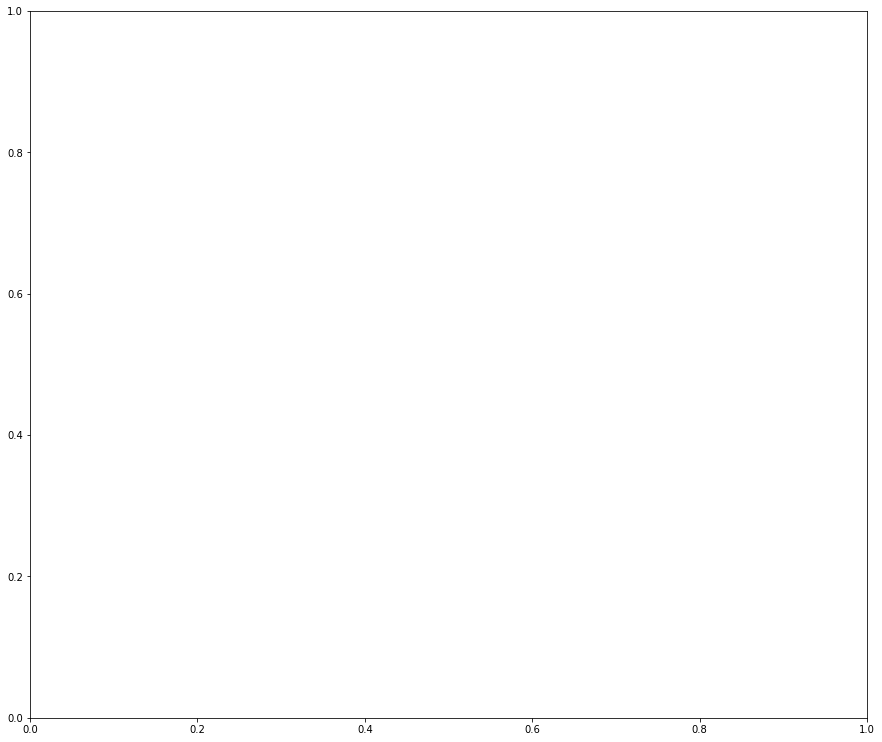

In [25]:
fig, ax = plt.subplots(figsize=(15,13))   
heatmap(confusion_matrix([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], prediction_matrix), annot = True, fmt='g')

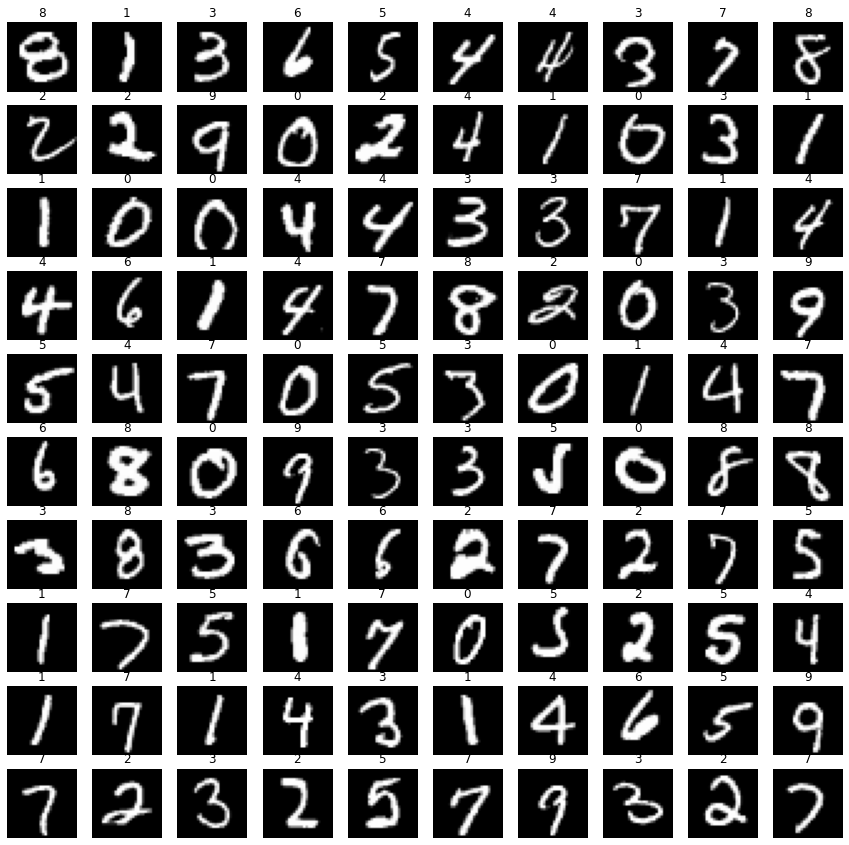

In [32]:
fig, ax = plt.subplots(10, 10, figsize=(15, 15))
for i in range(10):
    for j in range(10):
        r_num = randint(0, len(x_train))
        ax[i][j].imshow(x_train[r_num], cmap='gray')
        ax[i][j].set_title(predict_digit(x_train[r_num]))
        ax[i][j].axis('off')